In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
file_path = "/content/flights.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())

# Show first five rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['dep_delay', 'arr_delay', 'air_time'])

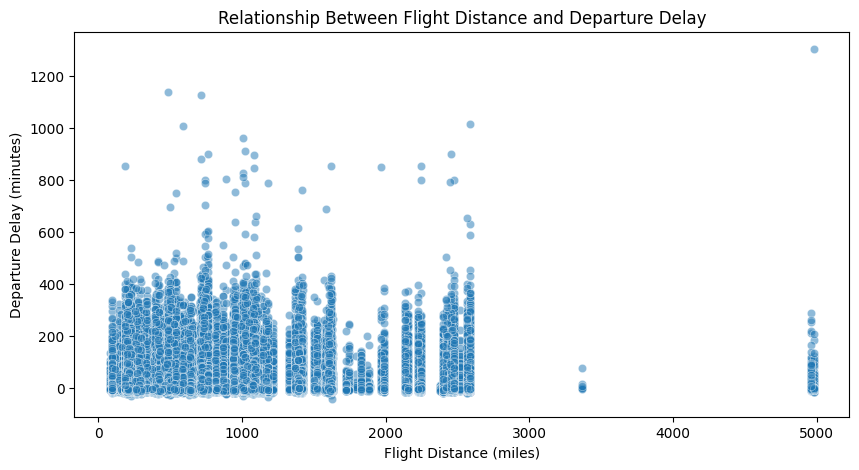

In [5]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_clean['distance'], y=df_clean['dep_delay'], alpha=0.5)
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Departure Delay (minutes)")
plt.title("Relationship Between Flight Distance and Departure Delay")
plt.show()

<ipython-input-6-b077a4daaffa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean['carrier'], order=df_clean['carrier'].value_counts().index, palette="viridis")


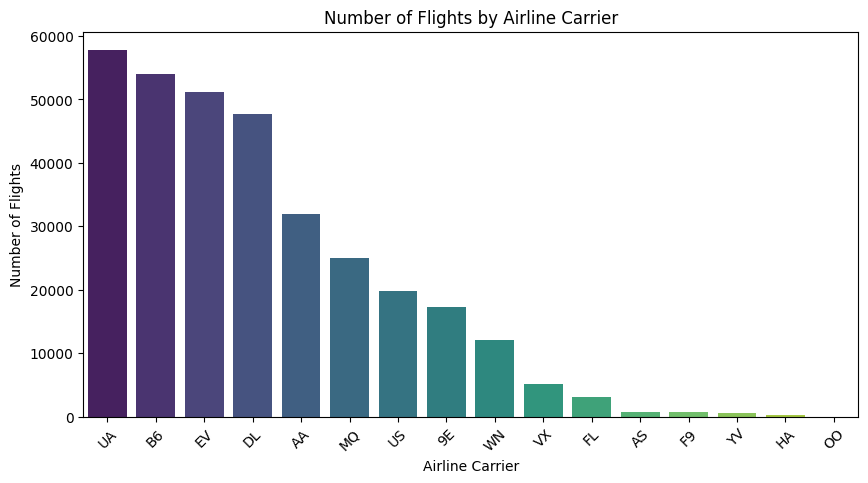

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_clean['carrier'], order=df_clean['carrier'].value_counts().index, palette="viridis")
plt.xlabel("Airline Carrier")
plt.ylabel("Number of Flights")
plt.title("Number of Flights by Airline Carrier")
plt.xticks(rotation=45)
plt.show()

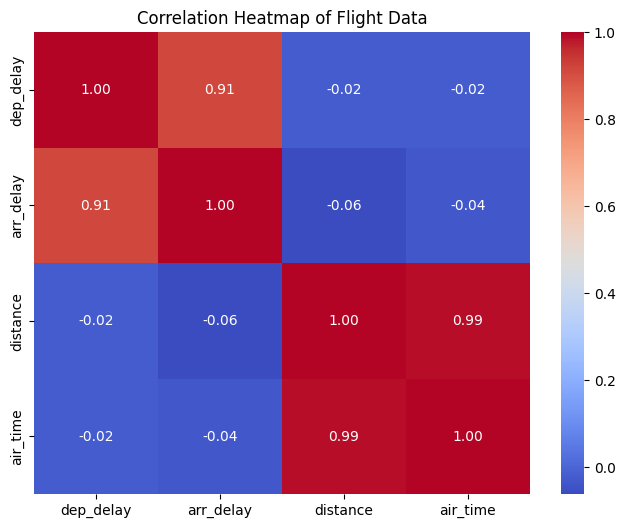

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['dep_delay', 'arr_delay', 'distance', 'air_time']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Flight Data")
plt.show()

In [8]:
# Extract departure delay column
delay_data = df_clean['dep_delay']

# Compute moments
mean_delay = np.mean(delay_data)
variance_delay = np.var(delay_data)
skewness_delay = delay_data.skew()
kurtosis_delay = delay_data.kurtosis()

# Print results
print(f"Mean Delay: {mean_delay:.2f} minutes")
print(f"Variance: {variance_delay:.2f}")
print(f"Skewness: {skewness_delay:.2f}")
print(f"Kurtosis: {kurtosis_delay:.2f}")

Mean Delay: 12.56 minutes
Variance: 1605.25
Skewness: 4.82
Kurtosis: 44.36
